In [1]:
import pandas as pd 
import scipy.stats as sp
import numpy as np 

In [2]:
sheet_names = ['Dienstregeling', 'Afstandsmatrix'] 
df_planning =pd.read_excel('omloopplanning.xlsx')
df_tijden = pd.read_excel('Connexxion data - 2024-2025.xlsx', sheet_name = sheet_names[0])
df_afstand = pd.read_excel('Connexxion data - 2024-2025.xlsx', sheet_name = sheet_names[1])

In [6]:
df_planning['eindtijd'] = pd.to_datetime(df_planning['eindtijd'],'%H:%M')
df_planning.head(1)

,Unnamed: 0,startlocatie,eindlocatie,starttijd,eindtijd,activiteit,buslijn,energieverbruik,starttijd datum,eindtijd datum,omloop nummer
0,0,ehvgar,ehvbst,05:03:00,2024-10-31 05:07:00,materiaal rit,NaN,1.98,2024-08-29 05:03:00,2024-08-29 05:07:00,1


C:\Users\robbi\AppData\Local\Temp\ipykernel_1832\1181657017.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_omloop_1['cumulatief_energieverbruik'] = df_omloop_1['energieverbruik'].cumsum()


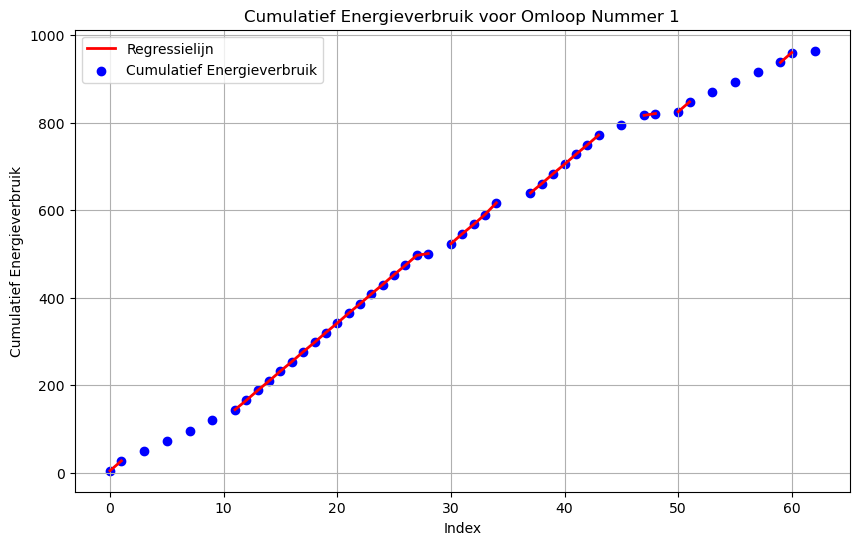

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Voorbeeld van het inladen van je DataFrame
# df_planning = pd.read_csv('je_bestand.csv')
def find_afstand(row, df_afstand):
    match = df_afstand[
        (df_afstand['startlocatie'] == row['startlocatie']) & 
        (df_afstand['eindlocatie'] == row['eindlocatie']) & 
        ((df_afstand['buslijn'] == row['buslijn']) | df_afstand['buslijn'].isna())
    ]
    if not match.empty:
        return match.iloc[0]['afstand in meters']
    else:
        0

df_planning['afstand_meters'] = df_planning.apply(lambda row: find_afstand(row, df_afstand), axis=1)
df_planning['afstand_km'] = df_planning['afstand_meters'] / 1000

# Stel energieverbruik_per_km in (vervang door de werkelijke waarde)
energieverbruik_per_km = 2.5  # Pas deze waarde aan
df_planning['energieverbruik'] = df_planning['afstand_km'] * energieverbruik_per_km


# Filteren op omloop nummer 1
df_omloop_1 = df_planning[df_planning['omloop nummer'] == 1]

# Cumulatieve som berekenen
df_omloop_1['cumulatief_energieverbruik'] = df_omloop_1['energieverbruik'].cumsum()

# Scatter plot maken van de cumulatieve som
plt.figure(figsize=(10, 6))

plt.plot(df_omloop_1.index, df_omloop_1['cumulatief_energieverbruik'], color='red', label='Regressielijn', linewidth=2)
plt.scatter(df_omloop_1.index, df_omloop_1['cumulatief_energieverbruik'], color='blue', label='Cumulatief Energieverbruik')
plt.title('Cumulatief Energieverbruik voor Omloop Nummer 1')
plt.xlabel('Index')
plt.ylabel('Cumulatief Energieverbruik')
plt.grid(True)
plt.legend()
plt.show()




    energieverbruik  cumulatief_energieverbruik  \
0            4.1250                      4.1250   
1           22.5075                     26.6325   
2               NaN                         NaN   
3           22.6250                     49.2575   
4               NaN                         NaN   
5           22.5075                     71.7650   
6               NaN                         NaN   
7           22.6250                     94.3900   
8               NaN                         NaN   
9           26.7700                    121.1600   
10              NaN                         NaN   
11          22.6250                    143.7850   
12          21.5000                    165.2850   
13          22.6250                    187.9100   
14          21.5000                    209.4100   
15          22.6250                    232.0350   
16          21.5000                    253.5350   
17          22.6250                    276.1600   
18          21.5000            

C:\Users\robbi\AppData\Local\Temp\ipykernel_1832\2130005571.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_omloop_1['cumulatief_energieverbruik'] = df_omloop_1['energieverbruik'].cumsum()  # Zorg dat je deze kolom eerder definieert
C:\Users\robbi\AppData\Local\Temp\ipykernel_1832\2130005571.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_omloop_1['cumulatief_verwacht_energieverbruik'] = df_omloop_1['verwacht_energieverbruik'].cumsum()


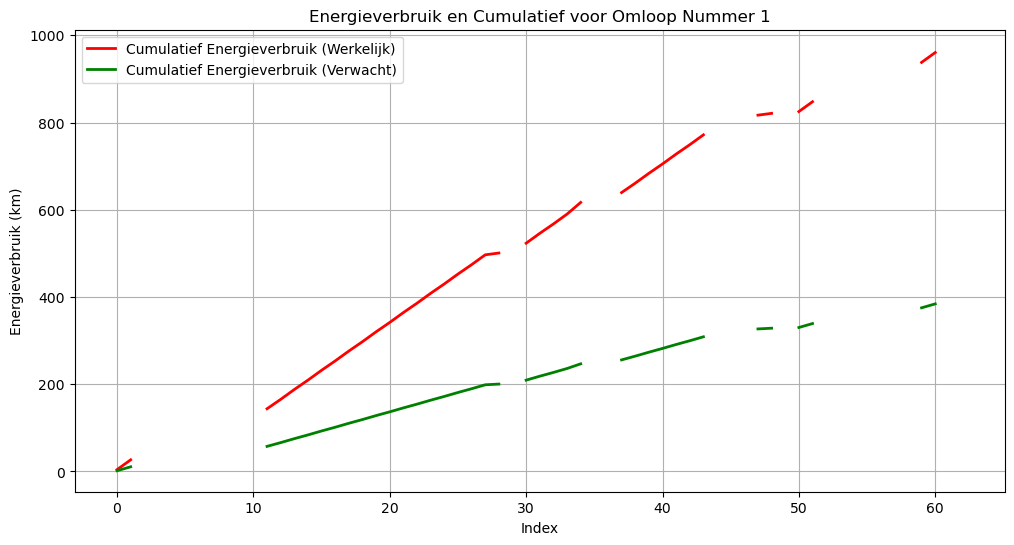

In [17]:
# Controleer of df_planning en df_afstanden niet leeg zijn
if df_planning.empty:
    raise ValueError("df_planning is leeg!")
if df_afstand.empty:
    raise ValueError("df_afstanden is leeg!")

# Voeg de afstanden toe aan de planning DataFrame
df_planning['afstand_meters'] = df_planning.apply(lambda row: find_afstand(row, df_afstand), axis=1)
df_planning['afstand_km'] = df_planning['afstand_meters'] / 1000

# Stel energieverbruik_per_km in (vervang door de werkelijke waarde)
energieverbruik_per_km = 1.0  # Pas deze waarde aan
df_planning['verwacht_energieverbruik'] = df_planning['afstand_km'] * energieverbruik_per_km

# Filteren op omloop nummer 1
df_omloop_1 = df_planning[df_planning['omloop nummer'] == 1]

# Cumulatieve som berekenen voor werkelijke en verwacht energieverbruik
df_omloop_1['cumulatief_energieverbruik'] = df_omloop_1['energieverbruik'].cumsum()  # Zorg dat je deze kolom eerder definieert
df_omloop_1['cumulatief_verwacht_energieverbruik'] = df_omloop_1['verwacht_energieverbruik'].cumsum()

# Print de eerste paar rijen van df_omloop_1 om de waarden te inspecteren
print(df_omloop_1[['energieverbruik', 'cumulatief_energieverbruik', 'cumulatief_verwacht_energieverbruik']].head(20))

# Plotten van de resultaten
plt.figure(figsize=(12, 6))

# Cumulatieve energieverbruik plotten
plt.plot(df_omloop_1.index, df_omloop_1['cumulatief_energieverbruik'], label='Cumulatief Energieverbruik (Werkelijk)', color='red', linewidth=2)

# Cumulatieve verwacht energieverbruik plotten
plt.plot(df_omloop_1.index, df_omloop_1['cumulatief_verwacht_energieverbruik'], label='Cumulatief Energieverbruik (Verwacht)', color='green', linewidth=2)

# Titel en labels
plt.title('Energieverbruik en Cumulatief voor Omloop Nummer 1')
plt.xlabel('Index')
plt.ylabel('Energieverbruik (km)')
plt.grid(True)
plt.legend()
plt.show()


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Voorbeeld van het inladen van je DataFrame
# df_planning = pd.read_csv('je_bestand.csv')
# df_afstanden = pd.read_csv('je_afstanden.csv')  # Zorg ervoor dat je dit inlaadt

# Functie om de afstand te vinden
def find_afstand(row, df_afstand):
    match = df_afstand[
        (df_afstand['startlocatie'] == row['startlocatie']) & 
        (df_afstand['eindlocatie'] == row['eindlocatie']) & 
        ((df_afstand['buslijn'] == row['buslijn']) | df_afstand['buslijn'].isna())
    ]
    if not match.empty:
        return match.iloc[0]['afstand in meters']
    else:
        return 0

# Controleer of df_planning en df_afstanden niet leeg zijn
if df_planning.empty:
    raise ValueError("df_planning is leeg!")
if df_afstand.empty:
    raise ValueError("df_afstanden is leeg!")

# Voeg de afstanden toe aan de planning DataFrame
df_planning['afstand_meters'] = df_planning.apply(lambda row: find_afstand(row, df_afstand), axis=1)
df_planning['afstand_km'] = df_planning['afstand_meters'] / 1000

# Stel energieverbruik_per_km in (vervang door de werkelijke waarde)
energieverbruik_per_km = 1.0  # Vervang dit door de daadwerkelijke waarde
df_planning['energieverbruik'] = df_planning['afstand_km'] * energieverbruik_per_km

# Verkrijg unieke omloop nummers
omloop_nummers = df_planning['omloop nummer'].unique()

# Loop door elke omloop nummer en maak een scatter plot
#for omloop in omloop_nummers:
    # Filteren op de huidige omloop nummer
    df_omloop = df_planning[df_planning['omloop nummer'] == omloop]

    # Cumulatieve som berekenen voor werkelijke en verwachte energieverbruik
    df_omloop['cumulatief_energieverbruik'] = df_omloop['energieverbruik'].cumsum()
    df_omloop['cumulatief_verwacht_energieverbruik'] = df_omloop['afstand_km'].cumsum() * energieverbruik_per_km

    # Scatter plot maken van de cumulatieve som
    plt.figure(figsize=(10, 6))
    plt.scatter(df_omloop.index, df_omloop['cumulatief_energieverbruik'], color='blue', label='Cumulatief Energieverbruik (Werkelijk)')
    plt.scatter(df_omloop.index, df_omloop['cumulatief_verwacht_energieverbruik'], color='orange', label='Cumulatief Energieverbruik (Verwacht)', alpha=0.5)
    plt.plot(df_omloop.index, df_omloop['cumulatief_energieverbruik'], color='red', linewidth=2)
    plt.plot(df_omloop.index, df_omloop['cumulatief_verwacht_energieverbruik'], color='green', linewidth=2)

    plt.title(f'Cumulatief Energieverbruik voor Omloop Nummer {omloop}')
    plt.xlabel('Index')
    plt.ylabel('Cumulatief Energieverbruik (km)')
    plt.grid(True)
    plt.legend()
    plt.show()


IndentationError: unexpected indent (1436437973.py, line 41)

In [ ]:
    # Cumulatieve som berekenen voor werkelijke en verwachte energieverbruik
df_omloop_1['cumulatief_energieverbruik'] = df_omloop_1['energieverbruik'].cumsum()
df_omloop_1['cumulatief_verwacht_energieverbruik'] = df_omloop_1['afstand_km'].cumsum() * energieverbruik_per_km

    # Scatter plot maken van de cumulatieve som
plt.figure(figsize=(10, 6))
plt.scatter(df_omloop_1.index, df_omloop_1['cumulatief_energieverbruik'], color='blue', label='Cumulatief Energieverbruik (Werkelijk)')
plt.scatter(df_omloop_1.index, df_omloop_1['cumulatief_verwacht_energieverbruik'], color='orange', label='Cumulatief Energieverbruik (Verwacht)', alpha=0.5)
plt.plot(df_omloop_1.index, df_omloop_1['cumulatief_energieverbruik'], color='red', linewidth=2)
plt.plot(df_omloop_1.index, df_omloop_1['cumulatief_verwacht_energieverbruik'], color='green', linewidth=2)

plt.title(f'Cumulatief Energieverbruik voor Omloop Nummer 1')
plt.xlabel('Index')
plt.ylabel('Cumulatief Energieverbruik (km)')
plt.grid(True)
plt.legend()
plt.show()


C:\Users\Youpk\AppData\Local\Temp\ipykernel_34860\2545052463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_omloop_1['cumulatief_energieverbruik'] = df_omloop_1['energieverbruik'].cumsum()


KeyError: 'afstand_km'

C:\Users\robbi\AppData\Local\Temp\ipykernel_1832\4148067615.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_omloop_1['cumulatief_energieverbruik'] = df_omloop_1['energieverbruik'].cumsum()  # Zorg dat je deze kolom eerder definieert
C:\Users\robbi\AppData\Local\Temp\ipykernel_1832\4148067615.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_omloop_1['cumulatief_verwacht_energieverbruik'] = df_omloop_1['verwacht_energieverbruik'].cumsum()


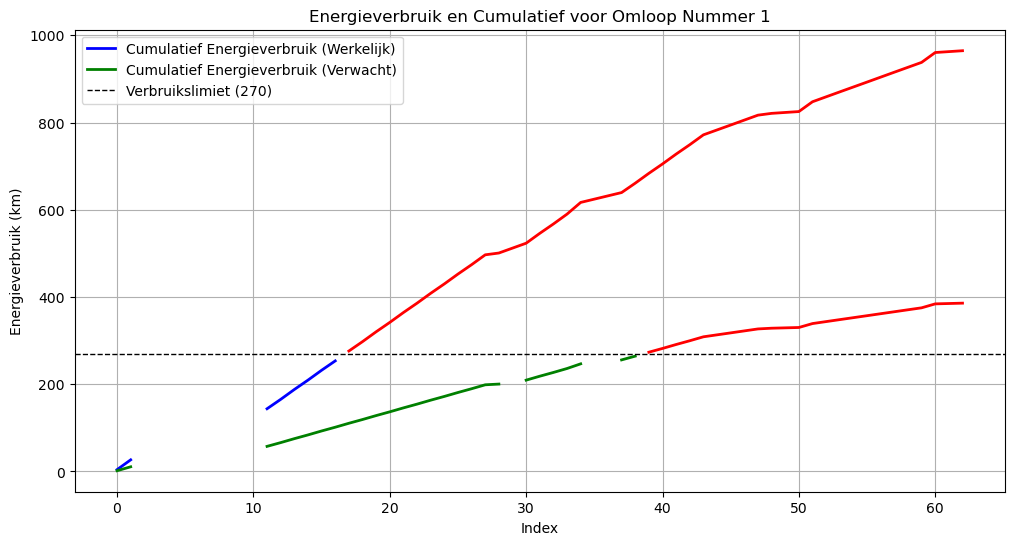

In [20]:
import matplotlib.pyplot as plt
import numpy as np

max_verbruik = 270

# Controleer of df_planning en df_afstanden niet leeg zijn
if df_planning.empty:
    raise ValueError("df_planning is leeg!")
if df_afstand.empty:
    raise ValueError("df_afstanden is leeg!")

# Voeg de afstanden toe aan de planning DataFrame
df_planning['afstand_meters'] = df_planning.apply(lambda row: find_afstand(row, df_afstand), axis=1)
df_planning['afstand_km'] = df_planning['afstand_meters'] / 1000

# Stel energieverbruik_per_km in (vervang door de werkelijke waarde)
energieverbruik_per_km = 1.0  # Pas deze waarde aan
df_planning['verwacht_energieverbruik'] = df_planning['afstand_km'] * energieverbruik_per_km

# Filteren op omloop nummer 1
df_omloop_1 = df_planning[df_planning['omloop nummer'] == 1]

# Cumulatieve som berekenen voor werkelijke en verwacht energieverbruik
df_omloop_1['cumulatief_energieverbruik'] = df_omloop_1['energieverbruik'].cumsum()  # Zorg dat je deze kolom eerder definieert
df_omloop_1['cumulatief_verwacht_energieverbruik'] = df_omloop_1['verwacht_energieverbruik'].cumsum()

# Plotten van de resultaten
plt.figure(figsize=(12, 6))

# Functie om de lijn te tekenen, waarbij kleuren veranderen bij overschrijden van max_verbruik
def plot_with_threshold(x, y, label, color_below, color_above):
    over_threshold = y > max_verbruik
    plt.plot(x[~over_threshold], y[~over_threshold], label=label, color=color_below, linewidth=2)
    plt.plot(x[over_threshold], y[over_threshold], color=color_above, linewidth=2)

# Cumulatieve werkelijke energieverbruik plotten met drempel
plot_with_threshold(df_omloop_1.index, df_omloop_1['cumulatief_energieverbruik'], 
                    label='Cumulatief Energieverbruik (Werkelijk)', color_below='blue', color_above='red')

# Cumulatieve verwachte energieverbruik plotten met drempel
plot_with_threshold(df_omloop_1.index, df_omloop_1['cumulatief_verwacht_energieverbruik'], 
                    label='Cumulatief Energieverbruik (Verwacht)', color_below='green', color_above='red')

# Toevoegen van een horizontale lijn op 270
plt.axhline(y=max_verbruik, color='black', linestyle='--', linewidth=1, label=f'Verbruikslimiet ({max_verbruik})')

# Titel en labels
plt.title('Energieverbruik en Cumulatief voor Omloop Nummer 1')
plt.xlabel('Index')
plt.ylabel('Energieverbruik (km)')
plt.grid(True)
plt.legend()
plt.show()
